<a href="https://colab.research.google.com/github/Dharmesh-Poriya07/Machine-Learning-Practicals/blob/main/Practical-02/Practical_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB - 02 : EXCERCISE**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Steps for Data Transformation**

1. Import Libraries
2. Load Data
3. Seprate Input and Output attributes
4. Perform scaling (Min-Max Normalization)
5. Perform Standardization

In [2]:
# Step 1: Import Libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# step 2: Load datset

dataset = pd.read_csv('/content/drive/MyDrive/Labs/Sem6_Labs/ML/Lab02/Exercise-CarData.csv',na_values = ["????","??"])
# Check type of all columns
print(dataset.dtypes)
print()
dataset

Unnamed: 0      int64
Price           int64
Age           float64
KM            float64
FuelType       object
HP            float64
MetColor      float64
Automatic       int64
CC              int64
Doors          object
Weight          int64
dtype: object



,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


In [ ]:
# Check how many nan values in each column
for col_name,col_val in dataset.iteritems():
  print("nan values in column (",col_name,") is : ",dataset[col_name].isna().sum())

nan values in column ( Unnamed: 0 ) is :  0
nan values in column ( Price ) is :  0
nan values in column ( Age ) is :  100
nan values in column ( KM ) is :  15
nan values in column ( FuelType ) is :  100
nan values in column ( HP ) is :  6
nan values in column ( MetColor ) is :  150
nan values in column ( Automatic ) is :  0
nan values in column ( CC ) is :  0
nan values in column ( Doors ) is :  0
nan values in column ( Weight ) is :  0


In [ ]:
# Step 3: Seprate Input and Output attributes

# features (as x)
x = dataset.iloc[:, ~dataset.columns.isin(['Price'])].values
print("Features (x) : \n",x)
print()

# label ( as y )
y = dataset.iloc[:,1].values
print("Size of y : ",y.size)
print("Label (y) :",y)

# x_new for performing scalling
x_new = dataset.iloc[:, ~dataset.columns.isin(['FuelType','Doors','Price'])].values
print("\nx_new : \n",x_new)

Features (x) : 
 [[0 23.0 46986.0 ... 2000 'three' 1165]
 [1 23.0 72937.0 ... 2000 '3' 1165]
 [2 24.0 41711.0 ... 2000 '3' 1165]
 ...
 [1433 nan 17016.0 ... 1300 '3' 1015]
 [1434 70.0 nan ... 1300 '3' 1015]
 [1435 76.0 1.0 ... 1600 '5' 1114]]

Size of y :  1436
Label (y) : [13500 13750 13950 ...  8500  7250  6950]

x_new : 
 [[0.0000e+00 2.3000e+01 4.6986e+04 ... 0.0000e+00 2.0000e+03 1.1650e+03]
 [1.0000e+00 2.3000e+01 7.2937e+04 ... 0.0000e+00 2.0000e+03 1.1650e+03]
 [2.0000e+00 2.4000e+01 4.1711e+04 ... 0.0000e+00 2.0000e+03 1.1650e+03]
 ...
 [1.4330e+03        nan 1.7016e+04 ... 0.0000e+00 1.3000e+03 1.0150e+03]
 [1.4340e+03 7.0000e+01        nan ... 0.0000e+00 1.3000e+03 1.0150e+03]
 [1.4350e+03 7.6000e+01 1.0000e+00 ... 0.0000e+00 1.6000e+03 1.1140e+03]]


In [ ]:
# Step 4: Perform scaling (Min-Max Normalization)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_new)
print("\n\nScaled X : \n", X_scaled)



Scaled X : 
 [[0.00000000e+00 2.78481013e-01 1.93354705e-01 ... 0.00000000e+00
  1.00000000e+00 2.68292683e-01]
 [6.96864111e-04 2.78481013e-01 3.00149383e-01 ... 0.00000000e+00
  1.00000000e+00 2.68292683e-01]
 [1.39372822e-03 2.91139241e-01 1.71646797e-01 ... 0.00000000e+00
  1.00000000e+00 2.68292683e-01]
 ...
 [9.98606272e-01            nan 7.00208643e-02 ... 0.00000000e+00
  0.00000000e+00 2.43902439e-02]
 [9.99303136e-01 8.73417722e-01            nan ... 0.00000000e+00
  0.00000000e+00 2.43902439e-02]
 [1.00000000e+00 9.49367089e-01 0.00000000e+00 ... 0.00000000e+00
  4.28571429e-01 1.85365854e-01]]


In [ ]:
# Step 5 : Perform standardization

std = StandardScaler()
X_std = std.fit_transform(x_new)
print("\n\nStandardized X : \n", X_std)



Standardized X : 
 [[-1.73084506 -1.75818903 -0.58042086 ... -0.24289308  2.31497633
   1.75856113]
 [-1.72843274 -1.75818903  0.11494569 ... -0.24289308  2.31497633
   1.75856113]
 [-1.72602041 -1.70437596 -0.72176642 ... -0.24289308  2.31497633
   1.75856113]
 ...
 [ 1.72602041         nan -1.383478   ... -0.24289308 -1.42599356
  -1.09191497]
 [ 1.72843274  0.7710253          nan ... -0.24289308 -1.42599356
  -1.09191497]
 [ 1.73084506  1.09390373 -1.83940116 ... -0.24289308  0.17727925
   0.78939926]]


## **2 Steps for Handling Categorical Data**

1. Import Libraries
2. Load Data
3. Seprate Input and Output attributes
4. Convert the categorical data into numerical data

In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
#Step 2: Load Data
# Data is already loaded
dataset

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


In [ ]:
# Step 3: Seprate Input and Output attributes
# data is already seprated
print("Input (Features) :\n",x)
print()
print("Output (Label) :\n",y)

Input (Features) :
 [[0 23.0 46986.0 ... 2000 'three' 1165]
 [1 23.0 72937.0 ... 2000 '3' 1165]
 [2 24.0 41711.0 ... 2000 '3' 1165]
 ...
 [1433 nan 17016.0 ... 1300 '3' 1015]
 [1434 70.0 nan ... 1300 '3' 1015]
 [1435 76.0 1.0 ... 1600 '5' 1114]]

Output (Label) :
 [13500 13750 13950 ...  8500  7250  6950]


In [ ]:
# Step 4a: Apply LabelEncoder on the data to convert FuelType into numeric values

le = LabelEncoder()
x[ : ,3] = le.fit_transform(x[ : ,3])
print("\n\nInput : \n", x[:,3])



Input : 
 [1 1 1 ... 2 3 2]


In [ ]:
# Step 4b: Use dummy variables from pandas library to create one column for each FuelType

dummy = pd.get_dummies(dataset['FuelType'])
print("\n\nDummy :\n",dummy)
dataset = dataset.drop(['FuelType'],axis=1)
# dataset = pd.concat([dummy,dataset],axis=1)
dataset.insert(loc = 4,
               column = 'CNG',
               value = dummy.iloc[:,0])
dataset.insert(loc = 5,
               column = 'Diesel',
               value = dummy.iloc[:,1])
dataset.insert(loc = 6,
               column = 'Petrol',
               value = dummy.iloc[:,2])
print("\n\nFinal Data :\n",dataset)



Dummy :
       CNG  Diesel  Petrol
0       0       1       0
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1436 rows x 3 columns]


Final Data :
       Unnamed: 0  Price   Age       KM  CNG  Diesel  Petrol     HP  MetColor  \
0              0  13500  23.0  46986.0    0       1       0   90.0       1.0   
1              1  13750  23.0  72937.0    0       1       0   90.0       1.0   
2              2  13950  24.0  41711.0    0       1       0   90.0       NaN   
3              3  14950  26.0  48000.0    0       1       0   90.0       0.0   
4              4  13750  30.0  38500.0    0       1       0   90.0       0.0   
...          ...    ...   ...      ...  ...     ...     ...    ...       ...   
1431        1431   7500   NaN  20544.0    0       0       1   86.0       1.0

In [ ]:
dataset

,Unnamed: 0,Price,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,0,1,0,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,0,1,0,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,0,1,0,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,0,1,0,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,0,1,0,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544.0,0,0,1,86.0,1.0,0,1300,3,1025
1432,1432,10845,72.0,NaN,0,0,1,86.0,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016.0,0,0,1,86.0,0.0,0,1300,3,1015
1434,1434,7250,70.0,NaN,0,0,0,86.0,1.0,0,1300,3,1015


## **4.3 Steps for Handling the missing value**

1. Import Libraries
2. Load data
3. Seprate Input and Output attributes
4. Find the missing values and handle it in either way
    
    a. Removing data
    
    b. Imputation

In [ ]:
# Step 1: Import Libraries

from sklearn.impute import SimpleImputer

In [ ]:
# Step 2: Load Data

dataset

,Unnamed: 0,Price,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986.0,0,1,0,90.0,1.0,0,2000,three,1165
1,1,13750,23.0,72937.0,0,1,0,90.0,1.0,0,2000,3,1165
2,2,13950,24.0,41711.0,0,1,0,90.0,NaN,0,2000,3,1165
3,3,14950,26.0,48000.0,0,1,0,90.0,0.0,0,2000,3,1165
4,4,13750,30.0,38500.0,0,1,0,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544.0,0,0,1,86.0,1.0,0,1300,3,1025
1432,1432,10845,72.0,NaN,0,0,1,86.0,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016.0,0,0,1,86.0,0.0,0,1300,3,1015
1434,1434,7250,70.0,NaN,0,0,0,86.0,1.0,0,1300,3,1015


In [ ]:
# Step 3: Seprate Input and Output attributes
# data is already seprated
print("Input (Features) :\n",x)
print()
print("Output (Label) :\n",y)

Input (Features) :
 [[0 23.0 46986.0 ... 2000 'three' 1165]
 [1 23.0 72937.0 ... 2000 '3' 1165]
 [2 24.0 41711.0 ... 2000 '3' 1165]
 ...
 [1433 nan 17016.0 ... 1300 '3' 1015]
 [1434 70.0 nan ... 1300 '3' 1015]
 [1435 76.0 1.0 ... 1600 '5' 1114]]

Output (Label) :
 [13500 13750 13950 ...  8500  7250  6950]


In [ ]:
# Step 4: Find the missing values and handle it in either way

data1 = pd.DataFrame(dataset)
# a.1. Removing the row with all null values
# data1.dropna(axis=0,how='all',inplace=True)
# print("\nNew Data :",data1)

# a.2. Removing the row with any one null values
data1.dropna(axis=0,how='any',inplace=True)
print("\nNew Data :",data1)
print()
data1.info()


New Data :       Unnamed: 0  Price   Age       KM  CNG  Diesel  Petrol     HP  MetColor  \
0              0  13500  23.0  46986.0    0       1       0   90.0       1.0   
1              1  13750  23.0  72937.0    0       1       0   90.0       1.0   
3              3  14950  26.0  48000.0    0       1       0   90.0       0.0   
4              4  13750  30.0  38500.0    0       1       0   90.0       0.0   
5              5  12950  32.0  61000.0    0       1       0   90.0       0.0   
...          ...    ...   ...      ...  ...     ...     ...    ...       ...   
1423        1423   7950  80.0  35821.0    0       0       1   86.0       0.0   
1424        1424   7750  73.0  34717.0    0       0       1   86.0       0.0   
1429        1429   8950  78.0  24000.0    0       0       1   86.0       1.0   
1430        1430   8450  80.0  23000.0    0       0       1   86.0       0.0   
1435        1435   6950  76.0      1.0    0       0       1  110.0       0.0   

      Automatic    CC  Door

In [ ]:
print(dataset)
data2 = pd.DataFrame(dataset)
print(data2)

      Unnamed: 0  Price   Age       KM  CNG  Diesel  Petrol     HP  MetColor  \
0              0  13500  23.0  46986.0    0       1       0   90.0       1.0   
1              1  13750  23.0  72937.0    0       1       0   90.0       1.0   
2              2  13950  24.0  41711.0    0       1       0   90.0       NaN   
3              3  14950  26.0  48000.0    0       1       0   90.0       0.0   
4              4  13750  30.0  38500.0    0       1       0   90.0       0.0   
...          ...    ...   ...      ...  ...     ...     ...    ...       ...   
1431        1431   7500   NaN  20544.0    0       0       1   86.0       1.0   
1432        1432  10845  72.0      NaN    0       0       1   86.0       0.0   
1433        1433   8500   NaN  17016.0    0       0       1   86.0       0.0   
1434        1434   7250  70.0      NaN    0       0       0   86.0       1.0   
1435        1435   6950  76.0      1.0    0       0       1  110.0       0.0   

      Automatic    CC  Doors  Weight  


In [ ]:
# b.1. Imputation
for col_name,col_val in data2.iteritems():
  if(col_name != "Price" and col_name != "CNG" and col_name != "Diesel" and col_name != "Petrol" and col_name != "Doors"):
    if(data2[col_name].isna().sum() != 0):
      data2[col_name] = data2[col_name].fillna(data2[col_name].mean())

data2

,Unnamed: 0,Price,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.000000,46986.000000,0,1,0,90.0,1.000000,0,2000,three,1165
1,1,13750,23.000000,72937.000000,0,1,0,90.0,1.000000,0,2000,3,1165
2,2,13950,24.000000,41711.000000,0,1,0,90.0,0.674961,0,2000,3,1165
3,3,14950,26.000000,48000.000000,0,1,0,90.0,0.000000,0,2000,3,1165
4,4,13750,30.000000,38500.000000,0,1,0,90.0,0.000000,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,55.672156,20544.000000,0,0,1,86.0,1.000000,0,1300,3,1025
1432,1432,10845,72.000000,68647.239972,0,0,1,86.0,0.000000,0,1300,3,1015
1433,1433,8500,55.672156,17016.000000,0,0,1,86.0,0.000000,0,1300,3,1015
1434,1434,7250,70.000000,68647.239972,0,0,0,86.0,1.000000,0,1300,3,1015


In [ ]:
# b.2. Imputation
data3 = pd.DataFrame(dataset)
print(data3)

      Unnamed: 0  Price        Age            KM  CNG  Diesel  Petrol     HP  \
0              0  13500  23.000000  46986.000000    0       1       0   90.0   
1              1  13750  23.000000  72937.000000    0       1       0   90.0   
2              2  13950  24.000000  41711.000000    0       1       0   90.0   
3              3  14950  26.000000  48000.000000    0       1       0   90.0   
4              4  13750  30.000000  38500.000000    0       1       0   90.0   
...          ...    ...        ...           ...  ...     ...     ...    ...   
1431        1431   7500  55.672156  20544.000000    0       0       1   86.0   
1432        1432  10845  72.000000  68647.239972    0       0       1   86.0   
1433        1433   8500  55.672156  17016.000000    0       0       1   86.0   
1434        1434   7250  70.000000  68647.239972    0       0       0   86.0   
1435        1435   6950  76.000000      1.000000    0       0       1  110.0   

      MetColor  Automatic    CC  Doors 

In [ ]:
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
for i in range(0,len(data3.axes[1])):
  if(data3.iloc[:,i].isna().sum() > 0 and (data3.iloc[:,:i].dtype == "int64" or data3.iloc[:,:i].dtype == "float64")):
    imputer = imputer.fit(data3[:, i:i+1])
    data3.iloc[:,:i] = imputer.transform(data3.iloc[:,i:i+1])
data3

,Unnamed: 0,Price,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.000000,46986.000000,0,1,0,90.0,1.000000,0,2000,three,1165
1,1,13750,23.000000,72937.000000,0,1,0,90.0,1.000000,0,2000,3,1165
2,2,13950,24.000000,41711.000000,0,1,0,90.0,0.674961,0,2000,3,1165
3,3,14950,26.000000,48000.000000,0,1,0,90.0,0.000000,0,2000,3,1165
4,4,13750,30.000000,38500.000000,0,1,0,90.0,0.000000,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,55.672156,20544.000000,0,0,1,86.0,1.000000,0,1300,3,1025
1432,1432,10845,72.000000,68647.239972,0,0,1,86.0,0.000000,0,1300,3,1015
1433,1433,8500,55.672156,17016.000000,0,0,1,86.0,0.000000,0,1300,3,1015
1434,1434,7250,70.000000,68647.239972,0,0,0,86.0,1.000000,0,1300,3,1015


### **4 Correlation**

In [ ]:
# Step 1: Import the necessary libraries
import seaborn as sns

In [ ]:
# Step 2: Loading the dataset

dataset2 = pd.DataFrame(dataset)
dataset2.drop(dataset2.columns[[1,11]],axis=1,inplace=True)
dataset2

,Unnamed: 0,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Weight
0,0,23.000000,46986.000000,0,1,0,90.0,1.000000,0,2000,1165
1,1,23.000000,72937.000000,0,1,0,90.0,1.000000,0,2000,1165
2,2,24.000000,41711.000000,0,1,0,90.0,0.674961,0,2000,1165
3,3,26.000000,48000.000000,0,1,0,90.0,0.000000,0,2000,1165
4,4,30.000000,38500.000000,0,1,0,90.0,0.000000,0,2000,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,55.672156,20544.000000,0,0,1,86.0,1.000000,0,1300,1025
1432,1432,72.000000,68647.239972,0,0,1,86.0,0.000000,0,1300,1015
1433,1433,55.672156,17016.000000,0,0,1,86.0,0.000000,0,1300,1015
1434,1434,70.000000,68647.239972,0,0,0,86.0,1.000000,0,1300,1015


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1436 non-null   float64
 3   KM          1436 non-null   float64
 4   CNG         1436 non-null   uint8  
 5   Diesel      1436 non-null   uint8  
 6   Petrol      1436 non-null   uint8  
 7   HP          1436 non-null   float64
 8   MetColor    1436 non-null   float64
 9   Automatic   1436 non-null   int64  
 10  CC          1436 non-null   int64  
 11  Doors       1436 non-null   object 
 12  Weight      1436 non-null   int64  
dtypes: float64(4), int64(5), object(1), uint8(3)
memory usage: 116.5+ KB


In [ ]:
# Selecting features based on correlation Generating the correlation matrix
corr = dataset2.corr()
corr.head(15)

,Unnamed: 0,Age,KM,CNG,Diesel,Petrol,HP,MetColor,Automatic,CC,Weight
Unnamed: 0,1.000000,0.872938,0.276041,-0.043811,-0.139813,0.124362,-0.108220,-0.074515,0.066299,-0.184490,-0.414577
Age,0.872938,1.000000,0.495199,0.006722,-0.068693,0.062043,-0.152946,-0.091331,0.030931,-0.116255,-0.442055
KM,0.276041,0.495199,1.000000,0.145203,0.404627,-0.323775,-0.332984,-0.088587,-0.080743,0.296281,-0.025758
CNG,-0.043811,0.006722,0.145203,1.000000,-0.034300,-0.219022,0.059430,0.003485,-0.024955,0.018141,0.051688
Diesel,-0.139813,-0.068693,0.404627,-0.034300,1.000000,-0.711686,-0.520332,-0.014227,-0.081090,0.730292,0.516471
Petrol,0.124362,0.062043,-0.323775,-0.219022,-0.711686,1.000000,0.404101,-0.005961,0.058664,-0.561913,-0.425511
HP,-0.108220,-0.152946,-0.332984,0.059430,-0.520332,0.404101,1.000000,0.060990,0.013753,0.053466,0.086214
MetColor,-0.074515,-0.091331,-0.088587,0.003485,-0.014227,-0.005961,0.060990,1.000000,-0.013167,0.027524,0.054952
Automatic,0.066299,0.030931,-0.080743,-0.024955,-0.081090,0.058664,0.013753,-0.013167,1.000000,-0.069321,0.057249
CC,-0.184490,-0.116255,0.296281,0.018141,0.730292,-0.561913,0.053466,0.027524,-0.069321,1.000000,0.651450


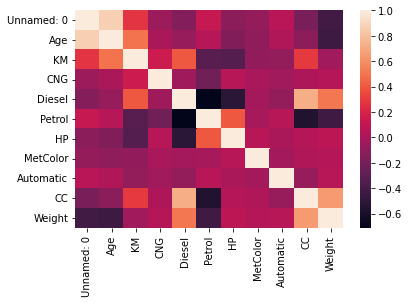

In [ ]:
# Generating the correlation heatmap

sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[0]):
    if corr.iloc[i,j] >= 0.9:
      if columns[j]:
        columns[j] = False

In [ ]:
selected_columns = dataset2.columns[columns]
selected_columns.shape

(11,)

In [ ]:
data = dataset2[selected_columns]
print(data)

      Unnamed: 0        Age            KM  CNG  Diesel  Petrol     HP  \
0              0  23.000000  46986.000000    0       1       0   90.0   
1              1  23.000000  72937.000000    0       1       0   90.0   
2              2  24.000000  41711.000000    0       1       0   90.0   
3              3  26.000000  48000.000000    0       1       0   90.0   
4              4  30.000000  38500.000000    0       1       0   90.0   
...          ...        ...           ...  ...     ...     ...    ...   
1431        1431  55.672156  20544.000000    0       0       1   86.0   
1432        1432  72.000000  68647.239972    0       0       1   86.0   
1433        1433  55.672156  17016.000000    0       0       1   86.0   
1434        1434  70.000000  68647.239972    0       0       0   86.0   
1435        1435  76.000000      1.000000    0       0       1  110.0   

      MetColor  Automatic    CC  Weight  
0     1.000000          0  2000    1165  
1     1.000000          0  2000    1165

> ### Exercise 1.1

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Labs/Sem6_Labs/ML/Lab02/train.csv");
corr = df.corr();
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
